### Домашнє завдання Тема 1

Завдання (крок за кроком)

1. Завантажити та створити DataFrame: Використовуйте бібліотеку  pandas для створення та роботи з DataFrame. Дані можна завантажити за допомогою load_iris() з бібліотеки sklearn.

2. Отримати базові статистичні характеристики: Використовуйте функції describe() з бібліотеки pandas для отримання статистичних характеристик.

3. Візуалізувати розподілення спостережень за класами: Використовуйте бібліотеку seaborn для побудови графіків.

4. Виконати стандартизацію даних: Використовуйте бібліотеку sklearn.preprocessing для стандартизації даних.

5. Виконати спектральну кластеризація: Використовуйте бібліотеку sklearn.cluster для виконання спектральної кластеризації.

6. Порівняти спрогнозовані кластери та дійсні класи: Використовуйте функцію confusion_matrix() з бібліотеки sklearn.metrics для отримання результатів.

7. Візуалізувати результати кластеризації: Використовуйте бібліотеку seaborn або інші засоби візуалізації для відображення результатів.

8. Висновок: Використовуйте середовище Jupyter Notebook або іншу платформу для написання текстових висновків та аналізу результатів.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Завантаження даних
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Перегляд перших рядків DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Описова статистика
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


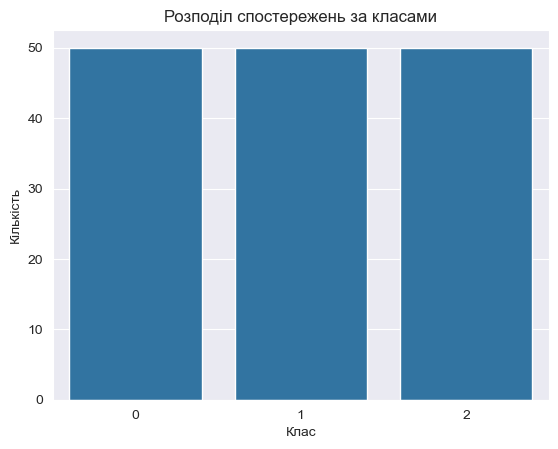

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Розподіл за класами
sns.countplot(x='target', data=df)
plt.title('Розподіл спостережень за класами')
plt.xlabel('Клас')
plt.ylabel('Кількість')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Стандартизація
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Перетворення в DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=iris.feature_names)

In [5]:
from sklearn.cluster import SpectralClustering

# Спектральна кластеризація
spectral_clustering = SpectralClustering(n_clusters=3, affinity='rbf', random_state=42)
predicted_clusters = spectral_clustering.fit_predict(scaled_data)

# Додавання кластерів до DataFrame
df['predicted_cluster'] = predicted_clusters

Confusion Matrix:
[[ 0 50  0]
 [45  0  5]
 [18  0 32]]


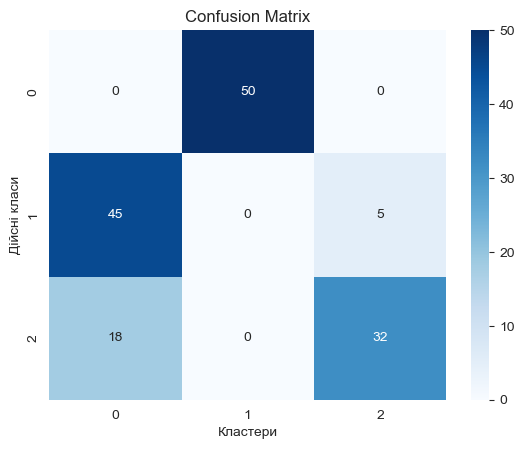

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Матриця похибок класифікації
conf_matrix = confusion_matrix(df['target'], df['predicted_cluster'])

# Відображення матриці
print("Confusion Matrix:")
print(conf_matrix)

# Нормалізована матриця для кращої візуалізації
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['target']),
            yticklabels=np.unique(df['target']))
plt.title('Confusion Matrix')
plt.xlabel('Кластери')
plt.ylabel('Дійсні класи')
plt.show()

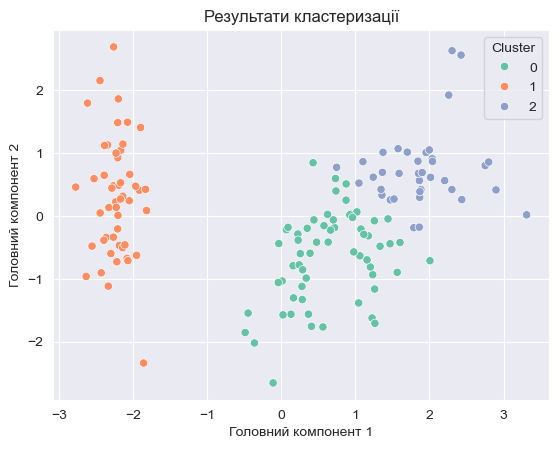

In [7]:
# Додавання PCA для візуалізації
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Перетворення в DataFrame
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['predicted_cluster']

# Графік кластеризації
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Результати кластеризації')
plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.show()

### Висновок

На основі аналізу матриці похибок класифікації та візуалізації можна зробити висновки про якість кластеризації та розбіжності між спрогнозованими кластерами та реальними класами.

Наприклад:
* Спектральна кластеризація успішно розділяє кластери, але можуть бути певні помилки через схожість між деякими класами.  
* Візуалізація головних компонентів показує чіткий розподіл.  
